In [87]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [88]:
mousecsv_df = pd.read_csv('data/Pymaceuticals_data_Mouse_metadata.csv')
studycsv_df = pd.read_csv('data/Pymaceuticals_data_Study_results.csv')
studycsv_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [89]:
merge_df = pd.merge(mousecsv_df, studycsv_df, on='Mouse ID')
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [90]:
#clean_merge = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'],keep='first')
#clean_merge.tail(60)

In [91]:
#merge_df.to_csv("merged.csv", index=False, header=True)


In [92]:
#Summary statistics for each drug regimen

merge_stats = merge_df.groupby(['Drug Regimen'])
merge_stats = merge_stats.describe()
merge_stats = merge_stats.iloc[:, 24:32]
merge_stats.head()

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817

<IPython.core.display.Javascript object>


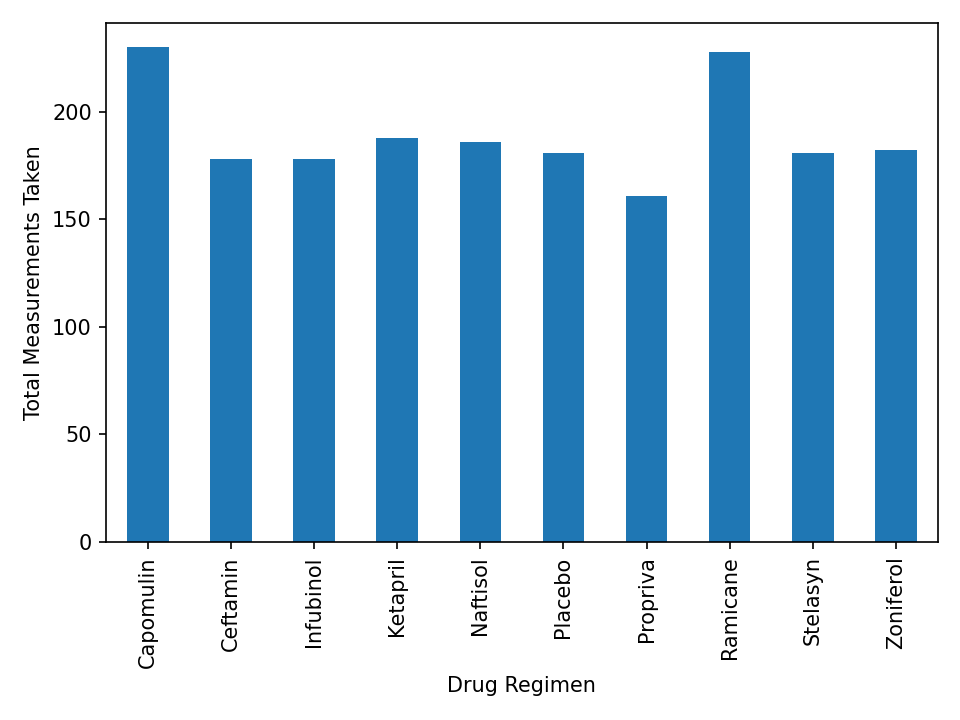

In [98]:
#Plot using DataFrame.plot()
count_chart = merge_stats['Tumor Volume (mm3)']['count'].plot(kind='bar')
count_chart.set_xlabel('Drug Regimen')
count_chart.set_ylabel('Total Measurements Taken')

plt.show()
plt.tight_layout()


In [96]:
# Set x axis and tick locations
x_axis = np.arange(len(merge_stats['Tumor Volume (mm3)']['count']))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
#plt.figure(figsize=(20,3))
plt.bar(x_axis, merge_stats['Tumor Volume (mm3)']['count'], color='r', alpha=0.5, align="center")
# plt.xticks(tick_locations, merge_stats['Tumor Volume (mm3)']['Drug Regimen'], rotation="vertical")





<BarContainer object of 10 artists>